In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Supervised Learning: Ensembles

meta-algorithms that combine several base estimators into one predictive model

* *why?*
    * *improve generalizability & robustness over a single estimator*


* *what?*
    * *improve stability and accuracy to reduce bias and variance*


***----Plan of Action----***

* **Decision Trees**:       <---------------------
    * DecisionTreeClassifier 
    
    
* **Ensembles**:
    * Averging:
        * VotingClassifier
        * BaggingClassifier
        * RandomForestClassifier
    * Boosting:
        * GradientBoostingRegressor
        * GradientBoostingClassifier
        * XGBClassifier

### Decision trees

+ve:

* fast to train (traverse a binary tree, as opposed to calculating every distance in a kNN)
* easy to understand (predicts most common class in leaf, after traverse tree from top to bottom)
- intuitive -> commonly used models both for classification and regression (popular in industry)
- invariant to scaling of the features --> less preprocessing
- distribution of the data is not important 
- easy to handle: missing values
- can build stronger models, by combining multiple trees
- non paramteric (tree model can become more and more flexible, if given more data) (number of free parameters grows with the number of samples)
- non linear


-ve

* tend to **overfit to the training data**
- unstable tree structure - depends on the initalisation of the splits, and number of nodes required
- consequently feature importance is unstable
- difficult to manage: categorical variables
- can't extrapolate, switch to linear models

***----Plan of Action----***

* **Decision Trees**:      
    * DecisionTreeClassifier 
    
    
* **Ensembles**:           <---------------------
    * Averging:
        * VotingClassifier
        * BaggingClassifier
        * RandomForestClassifier
    * Boosting:
        * GradientBoostingRegressor
        * GradientBoostingClassifier
        * XGBClassifier

### averaging methods

* base estimators are built/trained in **parallel** (independently) [--> average their predictions, arithmethic mean]

    * *why?*
        * *variance is reduced*
        * exploit the independence between the base learners
            * the error can be reduced dramatically by averaging.


e.g. 
1. Bagging methods
    * from sklearn.ensemble import BaggingClassifier
    * from sklearn.ensemble import BaggingRegressor
* Forests of randomised trees
    * from sklearn.ensemble import **RandomForestClassifier **

---

### boosting methods

* base estimators are built/trained **sequentially** [--> average their predictions, weighted sum]

    * *why?*
        * **reduce the bias**
        * *combine several weak models (dependent) to produce a powerful ensemble*
        
    * *seq?*
        * weighted versions of the data
    
    * *boosted?*
        * each model learns to fix the prediction errors of a prior model
            * weighing previously mislabeled examples with higher weight 
                * => reduces bias and variance
            
    * *-ve?*
        * may overfit
            
  
e.g. 
1. Adaptive Boosting
    * from sklearn.ensemble import **AdaBoostClassifier**
* Gradient Tree Boosting
    * from sklearn.ensemble import GradientBoostingClassifier
    * from sklearn.ensemble import GradientBoostingRegressor
    * from xgboost import XGBClassifier
    * from xgboost.sklearn import XGBClassifier  
    * from xgboost.sklearn import XGBRegressor

##### Terminology (aside)

* homogeneous ensembles
    * ensemble methods that use a single base learning algorithm 
    * i.e. base learners of the same type


* heterogeneous learners
    * base learners of different types


* how to increase the accuracy of ensemble methods above any of the individual members?
    * base learners must be:
        * as accurate as possible
        * as diverse as possible

## Ensemble:

* +ve:
    * accuracy
    * robust
    * stable


* -ve:
    * reduces interpretability 
    * time-consuming

## Averaging methods

***----Plan of Action----***

* **Decision Trees**:
    * DecisionTreeClassifier
    
    
* **Ensembles**:
    * Averging:
        * VotingClassifier    <---------------------
        * BaggingClassifier  
        * RandomForestClassifier
    * Boosting:
        * GradientBoostingRegressor
        * GradientBoostingClassifier
        * XGBClassifier

### Voting based Ensemble learning

* from sklearn.ensemble import VotingClassifier

* build/train two or more separate models (with different random seeds)
    * ideal for competitions, such as those on Kaggle
    * **not done in practice**, as takes time/computer memory, and makes the **model hard to understand**
    * assumes models not correlated (set of equally well performing model)
    * each model are considered as a ‘vote’
        * prediction <= majority vote or average predicted probabilities (soft vote) 

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=.2, 
                  # carefully picked random state for illustration
                  random_state=18) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0
)

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
voting = VotingClassifier(
    [('logreg', LogisticRegression(C=100)),
    ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))],
    voting='soft')
    # Soft voting 
    # 1. sum the predicted probabilities 
    # 2. take the arg max of the sum
    # 
    # Hard voting: majority rule voting
    # 1. everything makes a prediction 
    # 2. take the thing that was most commonly predicted.

voting.fit(X_train, y_train)
lr, tree = voting.estimators_

print("LogisticRegression score: {:.2f}".format(lr.score(X_test, y_test)))
# print("LogisticRegression score: {:.2f}".format(voting.estimators_[0].score(X_test, y_test)))

print("DecisionTreeClassifier score: {:.2f}".format(tree.score(X_test, y_test)))
# print("DecisionTreeClassifier score: {:.2f}".format(voting.estimators_[1].score(X_test, y_test)))

print("VotingClassifier score: {:.2f}".format(voting.score(X_test, y_test)))

LogisticRegression score: 0.84
DecisionTreeClassifier score: 0.80
VotingClassifier score: 0.88


C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


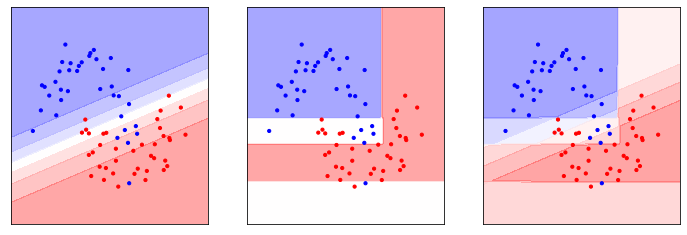

In [3]:
import numpy as np
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
# transform produces individual probabilities
y_probs =  voting.transform(X_grid)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(12, 4))
for prob, ax in zip([y_probs[:, 1], y_probs[:, 3], y_probs[:, 1::2].sum(axis=1)], axes.ravel()):
    ax.contourf(x_grid, y_grid, prob.reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)
plt.savefig("images/voting_classifier.png")

# 1st plot = LogisticRegression 
# 2nd plot = DecisionTreeClassifier 
# 3rd plot = VotingClassifier = "average" of the predicted probabilites

ISSUE: if models overfit in the same way, then "averaging" does not remove this

SOLUTION: ensure models are different from each other

***----Plan of Action----***

* **Decision Trees**:
    * DecisionTreeClassifier
    
    
* **Ensembles**:
    * Averging:
        * VotingClassifier
        * BaggingClassifier  <---------------------
        * RandomForestClassifier
    * Boosting:
        * GradientBoostingRegressor
        * GradientBoostingClassifier
        * XGBClassifier

## Bagging methods

* from sklearn.ensemble import BaggingClassifier
* from sklearn.ensemble import BaggingRegressor

Reminder:

* Bootstrap = sampling technique/process
    * select “n” observations out of a population of “n” observations
    * selection is entirely random
        * each observation can be chosen from the original population 
        * each observation is equally likely to be selected in each iteration

#### Bagging (Bootstrap AGGregatING) (Bootstrap AGGregation)

(reduces variance/overfitting)

ensemble meta-estimator
    
* fits base estimators each on **random** subsets of the original dataset
    * **samples are drawn with replacement** (Parameter: "bootstrap = True" is default)
        * want: build similar but slightly different models
        * better than: change the random seed, i.e. VotingClassifier
        * dataset: 1, 2, 3, 4, 5
        * sample:  1, 2, 3, 3, 5
        * sample:  1, 2, 1, 4, 5
            * **we can select the same value multiple times**
            * The size of the subsets is the same as the size of the original set


* i.e. *each model is exposed to a different subset of data* [in **parallel** (independently)]

        
* **aggregate their individual predictions** to form a final prediction
    * either by voting (for classification) or by averaging (for regression)


* i.e. train $M$ different trees $f_m$ on different subsets of the data (chosen randomly with replacement)

\begin{equation}
ensemble = f(x) = \frac{1}{M}\sum_{m=1}^{M}f_m(x) 
\end{equation}


* **equal weight** for each model


* **reduce the variance** of a black-box estimator (e.g., a decision tree)
    * by introducing randomization into its construction procedure
    * and ensembling (exploit the independence between the base learners)


* **number of trees? number of estimators?**
    * *more => improves average/accuracy*, with diminishing returns


* a decision tree =>
    * low bias and high variance (fits well, but different every time the model is applied) 
* bagging =>
    * **less data due to sampling**
    * more models (uncorrelated)
    * **reduces variance on average** (esp with unstable models)
    * **avoids overfitting**

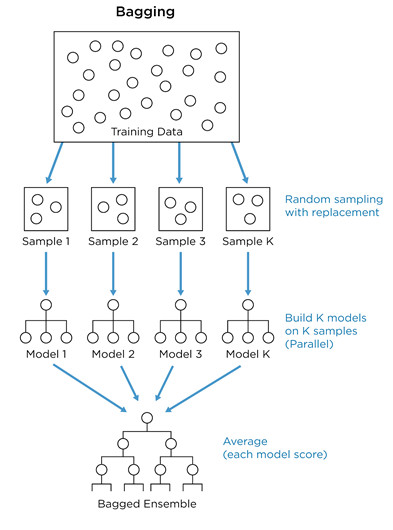

In [4]:
# bagging methods work best with strong and complex models (e.g., fully developed decision trees)
#
# boosting methods work best with weak models (e.g., shallow decision trees)

from IPython.display import Image
Image(filename = 'imagesDisplayedInJupyter/bagging.jpg',
      width=400)

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
            base_estimator = DecisionTreeClassifier(random_state=42), 
            # base estimator to fit on random subsets of the dataset
            n_estimators=50, 
            bootstrap=True, 
            n_jobs=-1,
            random_state=42)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [6]:
print("LogisticRegression score: {:.2f}".format(lr.score(X_test, y_test)))

print("DecisionTreeClassifier score: {:.2f}".format(tree.score(X_test, y_test)))

print("VotingClassifier score: {:.2f}".format(voting.score(X_test, y_test)))

print("BaggingClassifier score: {:.2f}".format(bag_clf.score(X_test, y_test)))

LogisticRegression score: 0.84
DecisionTreeClassifier score: 0.80
VotingClassifier score: 0.88
BaggingClassifier score: 0.88


***----Plan of Action----***

* **Decision Trees**:
    * DecisionTreeClassifier
    
    
* **Ensembles**:
    * Averging:
        * VotingClassifier
        * BaggingClassifier
        * RandomForestClassifier     <---------------------
    * Boosting:
        * GradientBoostingRegressor
        * GradientBoostingClassifier
        * XGBClassifier

### Randomised decision trees

* from sklearn.ensemble import RandomForestClassifier 

* if a data set contains a "strong" feature (wrt target output)

    * “bagged” trees => that "strong" feature = top/first split/node 
        * => ensemble of similar trees = correlated ☹️
            * averaging highly correlated quantities => not reduce variance ☹️
                * *i.e. although the bootstrapped samples may be slightly different, the data is largely going to break off at the **same** features throughout each model.*


* solution?

    * randomly leaving out candidate features from each split 
    * "decorrelates" the trees 🙂 (averaging process => reduce variance)
    * this is an ensemble.. called "RF"..

#### Random Forest

ensemble meta-estimator (intrinsically is an ensemble)

* fits a number of decision tree classifiers on *various sub-samples* of the dataset
    * **samples are drawn with replacement** (Parameter: "bootstrap = True" is default)
    * uses averaging to improve the predictive accuracy and control over-fitting
    * (sub-sample size is always the same as the original input sample size)


* why is the forest **random**? (what's the main difference from bagging?)

    * for each split in the tree (i.e. at every node)
        * **random** sample (subset) of features (**without replacement**)
            * either: deeper tree or weaker predictor
                * **benefit of randomness?**
                    * uncorrelated trees => *ave --> variance decreases*
                        * **number of trees? number of estimators?**
                            * *more => improves average*, with diminishing returns


* max_features
    * size of the random subsets of features to consider when splitting a node
        * *more => improves reduction in variance*, with increase in bias
        * Empirically,
            * max_features=None (i.e. all features instead of a random subset) (for regression problems)
            * max_features="sqrt" (i.e. random subset of size sqrt(n_features)) (for classification tasks)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
y_pred_rf

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [8]:
print("LogisticRegression score: {:.2f}".format(lr.score(X_test, y_test)))

print("DecisionTreeClassifier score: {:.2f}".format(tree.score(X_test, y_test)))

print("VotingClassifier score: {:.2f}".format(voting.score(X_test, y_test)))

print("BaggingClassifier score: {:.2f}".format(bag_clf.score(X_test, y_test)))

print("RandomForestClassifier score: {:.2f}".format(rnd_clf.score(X_test, y_test)))

LogisticRegression score: 0.84
DecisionTreeClassifier score: 0.80
VotingClassifier score: 0.88
BaggingClassifier score: 0.88
RandomForestClassifier score: 0.92


#### Decision Tree OVERFIT vs Random Forest DO NOT overfit

In [9]:
def building_trees_moons(maxdepth = 2):
    
    from sklearn.datasets import make_moons
    X, y = make_moons(noise=.2, 
                      # carefully picked random state for illustration
                      random_state=18) 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y)

    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth=maxdepth)
    clf.fit(X_train, y_train)
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(5, 5))

    eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    
    import numpy as np
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    # 'DecisionTreeClassifier' object has "predict_proba"
    decision_values = clf.predict_proba(X_grid)[:, 1]
    levels = [.5]
    fill_levels = [0, .5, 1]
    # if model is a regressor
    # decision_values = model.decision_function(X_grid)
    # levels = [0]
    # fill_levels = [decision_values.min(), 0, decision_values.max()]

    ax = plt.gca()
    ax.contourf(X1, X2, decision_values.reshape(X1.shape), levels=fill_levels, colors=['lightblue', 'peachpuff'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, alpha=.7, edgecolor='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=60, edgecolor='k')
    # plt.title("tree {0}".format(maxdepth))

    plt.tight_layout()
    plt.show()
    
def building_rf_moons(n_estimators = 100):
    
    from sklearn.datasets import make_moons
    X, y = make_moons(noise=.2, 
                      # carefully picked random state for illustration
                      random_state=18) 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y)

    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(5, 5))
    
    eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    
    import numpy as np
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    decision_values = clf.predict_proba(X_grid)[:, 1]
    levels = [.5]
    fill_levels = [0, .5, 1]
    
    ax = plt.gca()
    ax.contourf(X1, X2, decision_values.reshape(X1.shape), levels=fill_levels, colors=['lightblue', 'peachpuff'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, alpha=.7, edgecolor='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=60, edgecolor='k')
    
    plt.tight_layout()
    plt.show()

#### Decision Tree OVERFIT

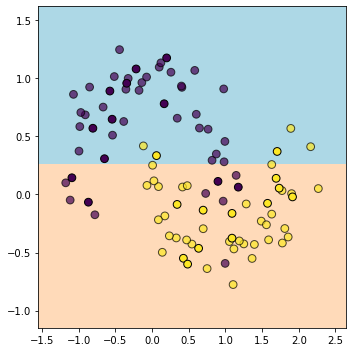

In [10]:
building_trees_moons(maxdepth = 1)  # maxdepth => "number of questions that we ask the data"

* **samples are drawn with replacement** => <s>same</s> predictions

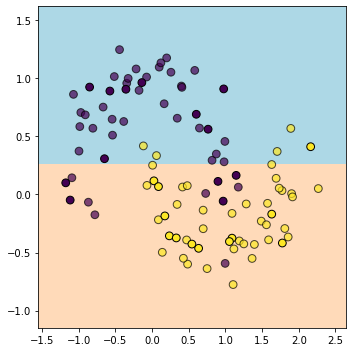

In [11]:
building_trees_moons(maxdepth = 1)

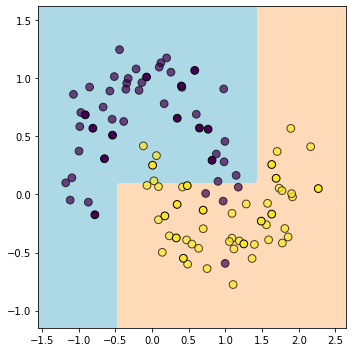

In [12]:
building_trees_moons(2)

* **samples are drawn with replacement** => <s>same</s> predictions

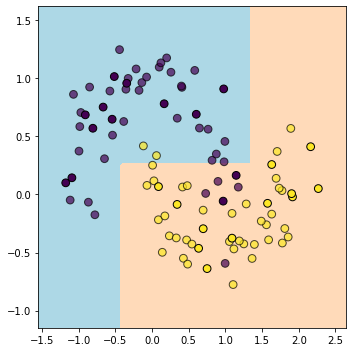

In [13]:
building_trees_moons(2)

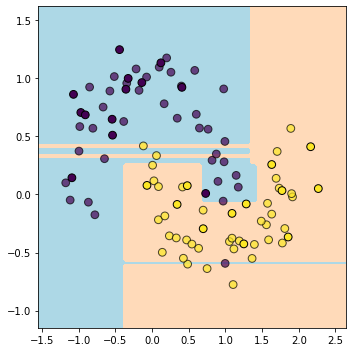

In [14]:
building_trees_moons(10)

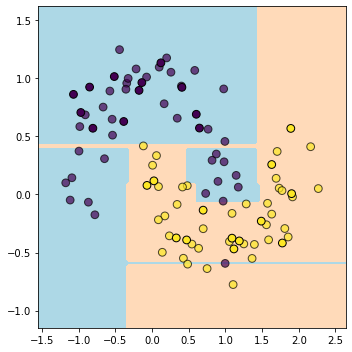

In [15]:
building_trees_moons(20)

#### each Decision Tree OVERFIT differently --> average many trees --> Random Forest

#### Random Forest DO NOT overfit

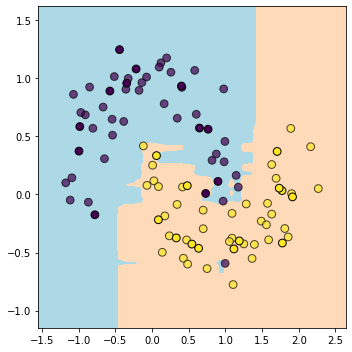

In [16]:
building_rf_moons(n_estimators = 135)

### RandomForestClassifier: warm_start

* if False: fit a whole new forest
* if True: reuse the solution of the previous call to fit and add more estimators to the ensemble
    * the existing fitted model attributes are used to initialise the new model (in a subsequent call to "fit")
    * i.e. add more trees to the forest (increasing n_estimators) => reduce variance [no point in grid search a rf]

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify=digits.target, random_state=0
)

In [18]:
train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True, random_state=0)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train) # i.e. add more trees
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

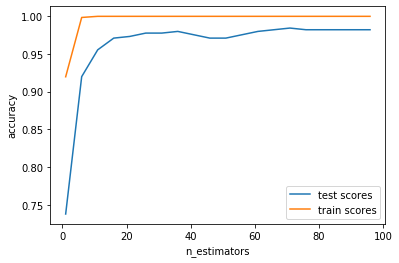

In [19]:
import matplotlib.pyplot as plt
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()
plt.savefig("images/warm_start_forest.png")
plt.show()

# can determine how many trees are required, here: "60" ish

***----Plan of Action----***

* **Decision Trees**:
    * DecisionTreeClassifier
    
    
* **Ensembles**:
    * Averging:
        * VotingClassifier
        * BaggingClassifier
        * RandomForestClassifier    
    * Boosting:                      <---------------------
        * GradientBoostingRegressor
        * GradientBoostingClassifier
        * XGBClassifier

# Boosting methods 

(reduces bias)

ensemble meta-estimator: sequential learning

* **convert weak learners into strong learners** (no longer "averaging")
    * weak learner = classifier that is only slightly correlated with the true classification
        * **small trees** (stumps, depth = 1)
        * simple models
        * bit better than a random guess
    * strong learner = classifier that is arbitrarily well-correlated with the true classification


* sequential/iterative process, where **each subsequent model attempts to correct the errors** of the previous model => **reduce bias**
* (no longer "independent" models)

    * ensemble is grown sequentially (no longer "random" trees being "averaged")
        * **base learners are trained in sequence on a weighted version of the data**
        * *i.e. each classifier is trained on data, taking into account the previous classifiers’ success*
        * data distribution is recomputed at each step 
        * *i.e. after each training step, the weights are redistributed.*
            * for each successive iteration
                * sample weights are individually modified 
                * learning algorithm is reapplied to the reweighted data
    * increase efficiency of each weak learner
        * **increase the weight of those samples that were misclassified**
            * i.e. subsequent models are constructed by fitting the residual error values of the initial model
            * i.e. reduce the weight of the ones that were correctly classified
            * i.e. every new learner is forced to focus on those regions that were more problematic for the previous estimator
            * i.e. difficult to predict receive ever-increasing influence
            * i.e. emphasise the most difficult cases
            * i.e. a learner with good a classification result on the training data will be assigned a higher weight than a poor one
            


* predictions (from the sequence of the models) are **combined**
    * weighted majority vote (classification) or a weighted sum (regression) [by their accuracy scores]


\begin{equation}
ensemble = f(x) = \sum_{m=1}^{M}"w"f_m(x) 
\end{equation}


NB: (first algorithm is trained on the entire data set and the subsequent algorithms are built by fitting the residuals of the first algorithm)


Further reading: Y. Freund, R. Schapire, “A Decision-Theoretic Generalization of on-Line Learning and an Application to Boosting”, 1995.

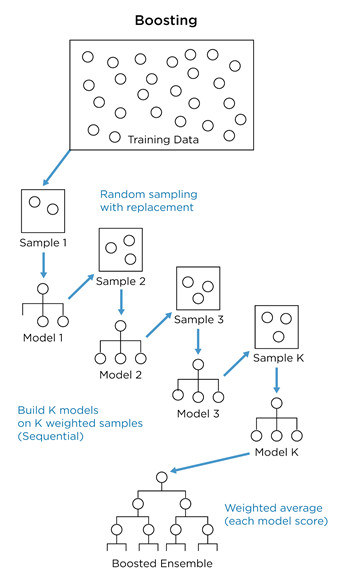

In [20]:
# bagging methods work best with strong and complex models (e.g., fully developed decision trees)
#
# boosting methods work best with weak models (e.g., shallow decision trees)

from IPython.display import Image
Image(filename = 'imagesDisplayedInJupyter/boosting.jpg',
      width=400)

#### AdaBoost (adaptive boosting) 

(**adapt to the weak learners**)

* from sklearn.ensemble import AdaBoostClassifier
* from sklearn.ensemble import AdaBoostRegressor

AdaBoostRegressor

1. fit a regressor on the original dataset 
* fits additional copies of the regressor on the same dataset 
* where the weights of instances are adjusted according to the error of the current prediction
    * subsequent regressors **focus more on difficult cases**

AdaBoostClassifier

1. fit a classifier on the original dataset
* fits additional copies of the classifier on the same dataset
    * where the weights of incorrectly classified instances are adjusted 
        * such that subsequent classifiers **focus more on difficult cases**

* How does AdaBoost combine these weak classifiers into a comprehensive prediction?

    * Use an optimally weighted majority vote of weak classifier.

* Pros
    * Fast
    * Simple and easy to program
    * just one parameter to tune
    * No prior knowledge needed about weak learner
    * Provably effective given Weak Learning Assumption
    * versatile

* Cons
    * Weak classifiers too complex leads to **OVERFITTING** => parameter tuning is critical
    * Weak classifiers too weak can lead to low margins, & overfitting
    * vulnerable to uniform noise

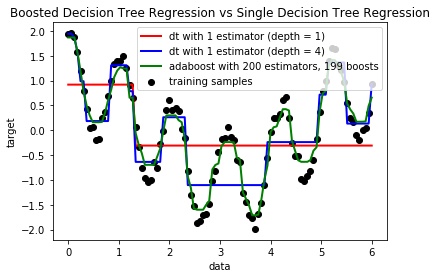

In [21]:
# utilised:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py
# License: BSD 3 clause

import numpy as np
X = np.linspace(0, 6, 100).reshape(100,1)
y = np.cos(X).ravel() + np.cos(6 * X).ravel() + np.random.normal(0, 0.1, 100)

from sklearn.tree import DecisionTreeRegressor
regr_dt_1 = DecisionTreeRegressor(max_depth=1) 
regr_dt_1_depth_4 = DecisionTreeRegressor(max_depth=4) 

from sklearn.ensemble import AdaBoostRegressor
regr_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=200)

# fit
regr_dt_1.fit(X, y)
regr_dt_1_depth_4.fit(X, y)
regr_ada.fit(X, y)

# Predict
y_dt_1 = regr_dt_1.predict(X)
y_dt_1_depth_4 = regr_dt_1_depth_4.predict(X)
y_ada = regr_ada.predict(X)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_dt_1, c="r", label="dt with 1 estimator (depth = 1)", linewidth=2)
plt.plot(X, y_dt_1_depth_4, c="b", label="dt with 1 estimator (depth = 4)", linewidth=2)
plt.plot(X, y_ada, c="g", label="adaboost with 200 estimators, 199 boosts", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression vs Single Decision Tree Regression")
plt.legend()
plt.show()

***----Plan of Action----***

* **Decision Trees**:
    * DecisionTreeClassifier
    
    
* **Ensembles**:
    * Averging:
        * VotingClassifier
        * BaggingClassifier
        * RandomForestClassifier    
    * Boosting:                      
        * GradientBoostingRegressor   <---------------------
        * GradientBoostingClassifier
        * XGBClassifier

### Gradient Tree Boosting

* reference: 
    * Greedy Function Approximation: A Gradient Boosting Machine, by Friedman
    * https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf

**Iteratively add regression trees to model**

* train a model $f_1$ to predict "$y$" $\implies$ prediction: $f_1(x) \approx y$

    * if $f_1$ is restricted, then it makes a bad prediction of y


* train a new model $f_2$ to predict the residual from first model "$y - f_1$" $\implies$ prediction: $f_2(x) \approx y - f_1(x)$

    * i.e. correct the mistakes made by f1


* train a new model $f_3$ to predict the new residual "$y - (f_1 - f_2)$" $\implies$ prediction: $f_3(x) \approx y - f_1(x) - f_2(x)$

$$f_i \rightarrow 0$$

\begin{align}
y & \approx \sum f_i(x) \\
 & \approx \sum dt \\ 
\end{align}

**Discount update by learning rate**

$$ \because dt  "overfits" \implies \gamma = learning rate $$

$$ y \approx \sum (\gamma) dt $$


* $ \gamma = 0.1 $ (i.e. trust all models the same)

FAQ: **Can we amend $\gamma$ ?** Yes, parameter tuning, but trade off:

* $\uparrow \gamma => \downarrow $ \# trees => quickly overfit

* $\downarrow \gamma => \uparrow $ \# trees => slowly overfit

NB:

* $\gamma$ = learning_rate = amount by which each trees contribution is "shrunk" 
* \# trees = n_estimators = number of boosting stages to perform


** Why "gradient"? **

* descending over the gradient in the function space of all linear combinations of trees

* a regression tree is fit on the negative gradient of the given loss function

### GradientBoostingRegressor: Demonstration

In [22]:
import numpy as np
rnd = np.random.RandomState(42)
x = rnd.uniform(-3, 3, size=100)
y_no_noise = (x) ** 3
y = (y_no_noise + rnd.normal(scale=3, size=len(x))) / 2
X = x.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

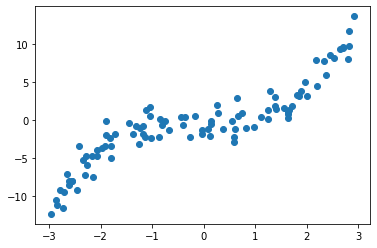

In [23]:
plt.scatter(X, y)

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=10, learning_rate=.3, random_state=0).fit(X_train, y_train)

#### predictions from training "x"

In [25]:
preds_train = [np.zeros(len(y_train))] + list(gbrt.staged_predict(X_train))

#### predictions at "every" x, to help plot the regression line on the output plt

In [26]:
# any number over 200 will aid the demonstartion in the plot below.
xaxis = np.linspace(X.min(), X.max(), 1000) 
preds = list(gbrt.staged_predict(xaxis[:, np.newaxis]))

#### GBRT: residuals decrease & prediction improves

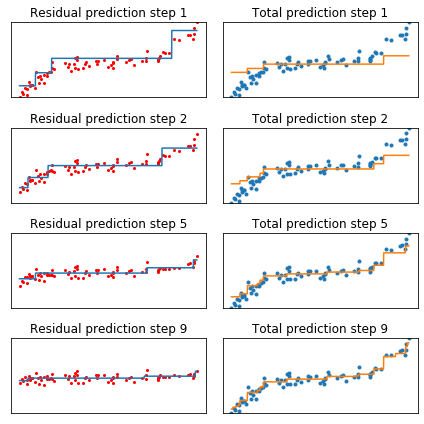

In [27]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 2, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(6, 6))

n_estimators = [0, 1, 4, 8]
for i in range(4):
    k = n_estimators[i]
    
    axes[i, 0].set_title("Residual prediction step {}".format(k + 1))
    axes[i, 0].plot(X_train[:, 0], y_train - preds_train[k], 'o', c = 'r', markersize=2)
    # line in residuals plot
    axes[i, 0].plot(xaxis, gbrt.estimators_[k, 0].predict(xaxis[:, np.newaxis]))
    
    axes[i, 1].set_title("Total prediction step {}".format(k + 1))    
    axes[i, 1].plot(X_train[:, 0], y_train, 'o', markersize=3)
    # "squashed" line in prediction plot
    axes[i, 1].plot(xaxis, preds[k])
    
for ax in axes.ravel():
    ax.set_ylim(y.min(), y.max())

plt.tight_layout()

plt.show()

***----Plan of Action----***

* **Decision Trees**:
    * DecisionTreeClassifier
    
    
* **Ensembles**:
    * Averging:
        * VotingClassifier
        * BaggingClassifier
        * RandomForestClassifier    
    * Boosting:                      
        * GradientBoostingRegressor   
        * GradientBoostingClassifier   <---------------------
        * XGBClassifier

### GradientBoostingClassifier: Demonstration

*Reminder: Classification: Goal is to regress the probabilities.*

binary  => logistic function => min log loss
multi-class => 1 vs rest

by adding models, we get a more " perfect " fit for the data, but more complex decision boundaries => overfit

white: probability of 0.5 (i.e. a tie)
red: high probability for the red class
blue: high probability for the blue class

#### each decision tree has depth TWO (decision stump / weak learner)

* GradientBoostingClassifier: dtrees used for regression

In [28]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=.2, random_state=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=20, learning_rate=.1, random_state=0).fit(X_train, y_train)

#### create a grid for plotting decision functions...

In [29]:
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

probs = list(gbrt.staged_predict_proba(X_grid))

####  plot probabilities assigned by the model

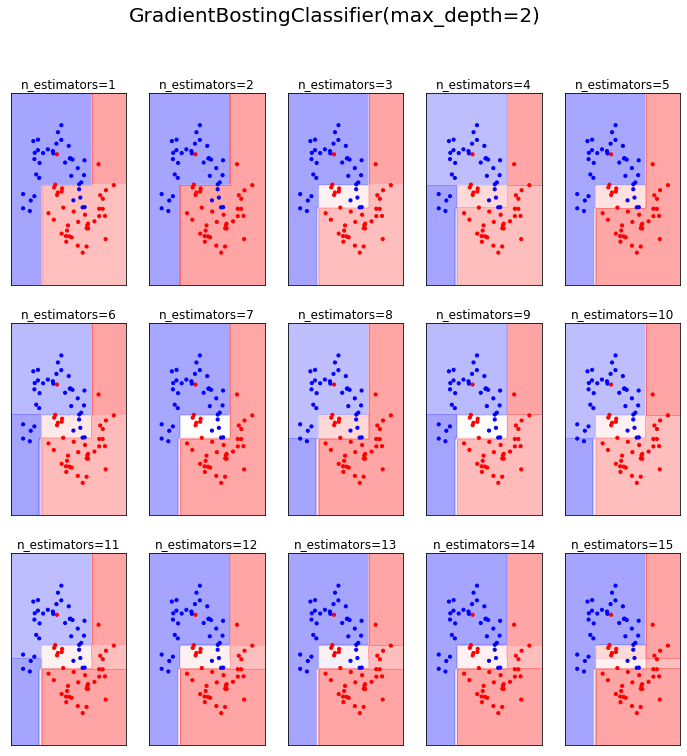

In [30]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 5, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(12, 12))
for i, (prob, ax) in enumerate(zip(probs, axes.ravel())):
    ax.set_title("n_estimators={}".format(i + 1))
    ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)
fig.suptitle("GradientBostingClassifier(max_depth=2)", fontsize=20)
plt.savefig("images/grad_boost_depth2.png")
plt.show()

### Benefits of a Gradient Boosting Algorithm? (e.g. instead of a rf)

* faster to predict BUT slower to train
* shallow trees & less trees needed ["on average"]
* better accuracy ["on average"]

***----Plan of Action----***

* **Decision Trees**:
    * DecisionTreeClassifier
    
    
* **Ensembles**:
    * Averging:
        * VotingClassifier
        * BaggingClassifier
        * RandomForestClassifier    
    * Boosting:                      
        * GradientBoostingRegressor   
        * GradientBoostingClassifier  
        * XGBClassifier              <---------------------

### Extreme Gradient Boosting

* from **xgboost** import XGBClassifier

* **XGBoost**

    * http://xgboost.readthedocs.io/en/latest/
        * **scalable, portable and accurate**
    * https://github.com/dmlc/xgboost/tree/master/demo/guide-python
    * scikit-learn compatible
        * https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
    * algorithm is parallelisable (parallel processing)
        * harness the power of multi-core computers
    * supports missing values (don't need to do an imputation strategy)
    * efficient implementation of gradient boosting (5x sklearn) => faster
        * Originally written in C++, it is comparatively faster than other ensemble classifiers.
    * adds l1 and l2 penalty on leaf-weights
    * Fast approximate split finding
    * https://arxiv.org/abs/1603.02754
    * Wide variety of tuning parameters:
        * cross-validation, regularization (to reduce overfitting), user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc
            * https://xgboost.readthedocs.io/en/latest/parameter.html
    * Tree Pruning: 
        * A GBM stop splitting a node when it encounters a negative loss in the split [greedy algorithm]
        * XGBoost make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain. (i.e. goes deeper)

In [31]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.2) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
voting = VotingClassifier(
    [('logreg', LogisticRegression(C=100)),
    ('tree', DecisionTreeClassifier(max_depth=3))],
    voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
print("LogisticRegression score: {:.2f}".format(lr.score(X_test, y_test)))
print("DecisionTreeClassifier score: {:.2f}".format(tree.score(X_test, y_test)))
print("VotingClassifier score: {:.2f}".format(voting.score(X_test, y_test)))

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
            base_estimator = DecisionTreeClassifier(), 
            n_estimators=50, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
print("BaggingClassifier score: {:.2f}".format(bag_clf.score(X_test, y_test)))

from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
print("RandomForestClassifier score: {:.2f}".format(rnd_clf.score(X_test, y_test)))

from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=15, learning_rate=0.3)
gbrt.fit(X_train, y_train)
print("GradientBoostingRegressor score: {:.2f}".format(gbrt.score(X_test, y_test)))

from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=15, learning_rate=0.1)
gbrt.fit(X_train, y_train)
print("GradientBoostingClassifier score: {:.2f}".format(gbrt.score(X_test, y_test)))

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)
print("XGBClassifier score: {:.2f}".format(xgb.score(X_test, y_test)))

C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression score: 0.92
DecisionTreeClassifier score: 0.76
VotingClassifier score: 0.88
BaggingClassifier score: 0.96
RandomForestClassifier score: 1.00
GradientBoostingRegressor score: 0.75
GradientBoostingClassifier score: 0.92
XGBClassifier score: 0.92


## Ensembles: Summary

* Model non-linear relationships
* Don't need to scaling / feature engineering (reduces preprocessing)
* Single tree: (if small) very interpretable 
* Random forests: very robust, good benchmark (more trees => better)
* Gradient boosting: often best performance with careful tuning (trees vs learning rate)

When not to use trees/ensembles?

* high dimensional sparse data (linear models might work better)